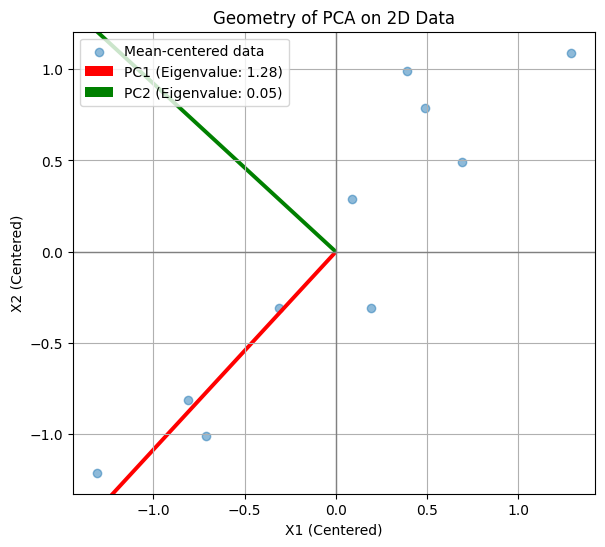

In [1]:
# Question 2: Geometry of PCA
# Description: Compute PCA on a simple 2D matrix and manually derive its principal components.

import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

X_meaned = X - np.mean(X, axis=0)

cov_matrix = np.cov(X_meaned.T)

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

X_pca = X_meaned @ eig_vecs

plt.figure(figsize=(8, 6))

plt.scatter(X_meaned[:, 0], X_meaned[:, 1], alpha=0.5, label='Mean-centered data')

for i in range(2):
    vec = eig_vecs[:, i] * 2  
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
               color=['r', 'g'][i], label=f'PC{i+1} (Eigenvalue: {eig_vals[i]:.2f})')

plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Geometry of PCA on 2D Data")
plt.xlabel("X1 (Centered)")
plt.ylabel("X2 (Centered)")
plt.legend()
plt.grid(True)
plt.show()
